In [1]:
from __future__ import absolute_import, division, print_function

import pathlib
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ML Libraries: 
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.utils import shuffle

import plotly.figure_factory as ff
import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools 
py.init_notebook_mode (connected = True)

import cufflinks as cf
cf.go_offline()
import platform

In [2]:
# Importing Auto MPG dataset

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 

raw_dataset = pd.read_csv("../Predicting Fuel Efficiency/auto-mpg.csv")

dataset = raw_dataset.copy()
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Cleaning the data
#------------------
#Drop the NA rows

dataset = dataset.dropna()

# The "Origin" column is categorical. So converting that to numeric values:

origin = dataset.pop('origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,USA,Europe,Japan
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1.0,0.0,0.0
394,44.0,4,97.0,52,2130,24.6,82,vw pickup,0.0,1.0,0.0
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1.0,0.0,0.0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1.0,0.0,0.0
397,31.0,4,119.0,82,2720,19.4,82,chevy s-10,1.0,0.0,0.0


In [4]:
# Splitting the data into train and test set
# ------------------------------------------

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
tsc = test_dataset.copy();
working_dataset = train_dataset.copy();

train_dataset.pop('car name')
test_dataset.pop('car name')
# Breif information about the Data Sets
train_dataset.info()
print("_____________________________________\n")
test_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 65 to 143
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           318 non-null    float64
 1   cylinders     318 non-null    int64  
 2   displacement  318 non-null    float64
 3   horsepower    318 non-null    object 
 4   weight        318 non-null    int64  
 5   acceleration  318 non-null    float64
 6   model year    318 non-null    int64  
 7   USA           318 non-null    float64
 8   Europe        318 non-null    float64
 9   Japan         318 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 27.3+ KB
_____________________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 9 to 396
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           80 non-null     float64
 1   cylinders     80 non-null     int64  


In [5]:
working_dataset['Continent'] = np.where(working_dataset['USA'] == 1.0, 'USA',
                                np.where(working_dataset['Japan'] == 1.0, 'Japan', 'Europe'))
working_dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,USA,Europe,Japan,Continent
207,20.0,4,130.0,102,3150,15.7,76,volvo 245,0.0,1.0,0.0,Europe
279,29.5,4,98.0,68,2135,16.6,78,honda accord lx,0.0,0.0,1.0,Japan
227,19.0,6,225.0,100,3630,17.7,77,plymouth volare custom,1.0,0.0,0.0,USA
148,26.0,4,116.0,75,2246,14.0,74,fiat 124 tc,0.0,1.0,0.0,Europe
143,26.0,4,97.0,78,2300,14.5,74,opel manta,0.0,1.0,0.0,Europe


In [6]:
usa = working_dataset[working_dataset["USA"]==1.0]
europe = working_dataset[working_dataset["Europe"]==1.0]
japan = working_dataset[working_dataset["Japan"]==1.0]

usa_car_count = working_dataset["USA"].value_counts()
europe_car_count = working_dataset["Europe"].value_counts()
japan_car_count = working_dataset["Japan"].value_counts()

working_dataset = shuffle(working_dataset)
train_continet_car_count = working_dataset["Continent"].value_counts()

test_dataset = shuffle(test_dataset)
test_continet_car_count = test_dataset["mpg"].count()

print(usa_car_count)
print(europe_car_count)
print(japan_car_count)

print("Training Set Car Count ", train_continet_car_count)
print("Test Set Car Count", test_continet_car_count)

1.0    204
0.0    114
Name: USA, dtype: int64
0.0    266
1.0     52
Name: Europe, dtype: int64
0.0    256
1.0     62
Name: Japan, dtype: int64
Training Set Car Count  USA       204
Japan      62
Europe     52
Name: Continent, dtype: int64
Test Set Car Count 80


**Data Visualization**

In [7]:
#1. Pie Chart for car count
colors = ['aqua', 'gray', 'teal']

trace_train= go.Pie(labels = train_continet_car_count.index,
              values = train_continet_car_count.values, marker=dict(colors=colors))

layout = go.Layout(title = "Training Data :: Car Distribution")
data = [trace_train]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [8]:
# 1 Boxplot 

usa = working_dataset[working_dataset["Continent"]=="USA"]
europe = working_dataset[working_dataset["Continent"]=="Europe"]
japan = working_dataset[working_dataset["Continent"]=="Japan"]

trace = go.Box(y = usa["mpg"],fillcolor="aqua", name= "USA" )
trace1 = go.Box(y = europe["mpg"], fillcolor="pink", name= "Europe" )
trace2 = go.Box(y = japan["mpg"], fillcolor="teal", name= "Japan" )

layout = go.Layout(title="Fuel Efficiency Distribution w.r.t Continent :: [Box Plot]", 
                   yaxis=dict(title="Fuel Efficiency (mile per gallon)"), 
                   xaxis= dict(title="Continent (USA / Europe  /Japan)"))

data=[trace, trace1, trace2]
fig = go.Figure(data = data, layout=layout)
py.iplot(fig)

In [9]:
# Car vs Mileage 
#age_count = df["Age"].dropna().value_counts()
top_fifteen_train_dataset = working_dataset.nlargest(15, 'mpg')
train_car_names = top_fifteen_train_dataset["car name"].dropna()
train_car_mileage = top_fifteen_train_dataset["mpg"].dropna()
print(train_car_mileage)
trace = go.Bar(x = train_car_names,
              y = train_car_mileage, 
              marker = dict(color = train_dataset["mpg"],
                           colorscale = "Jet", 
                           showscale = True))
layout = go.Layout(title = "Car Mileage Distribution :: Most Fuel Efficient Cars (Top 15)", 
                  yaxis = dict(title = "Fuel Efficiency"))
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

322    46.6
329    44.6
325    44.3
394    44.0
326    43.4
309    41.5
330    40.9
324    40.8
247    39.4
344    39.0
310    38.1
385    38.0
383    38.0
378    38.0
387    38.0
Name: mpg, dtype: float64


In [10]:
# Displacement vs Mileage [Scatter Plot]
train_displacements = working_dataset["displacement"].dropna()
trace = go.Scatter(x = train_displacements, y = working_dataset["mpg"].dropna(), 
              mode = 'markers',                 
              marker = dict(color = train_dataset["mpg"],
                           colorscale = "Jet", 
                           showscale = True))
layout = go.Layout(title = "Diasplacement vs Mileage Distribution :: [Scatter Plot]", 
                  xaxis = dict(title = 'Car Displacement'), 
                  yaxis = dict(title = 'Car Fuel Efficiency (mile per gallon)'))
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

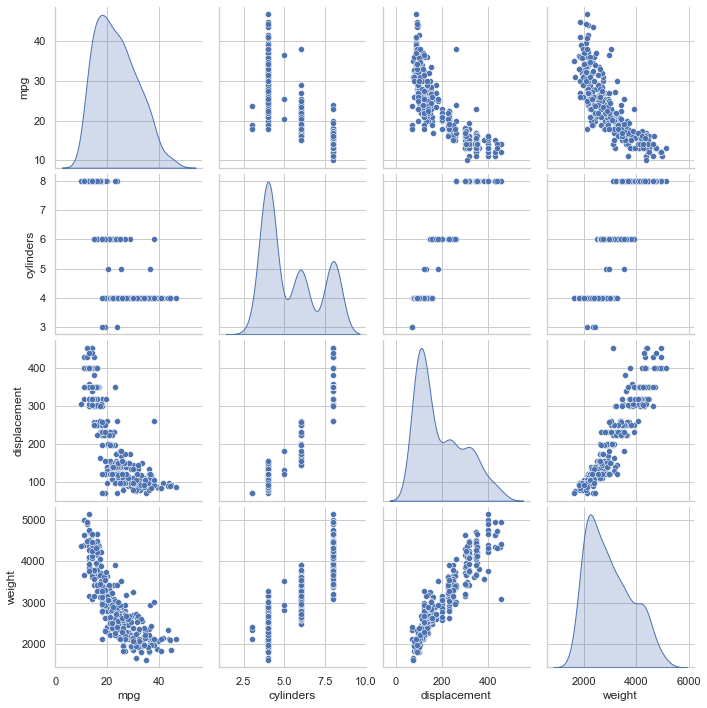

In [11]:
# Inspect the data
# ----------------

sns.pairplot(working_dataset[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")

In [12]:
#Overall statistics:

train_stats = train_dataset.describe()
train_stats.pop("mpg")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
model year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
USA,318.0,0.641509,0.480313,0.0,0.00,1.0,1.00,1.0
Europe,318.0,0.163522,0.370424,0.0,0.00,0.0,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.00,0.0,0.00,1.0


In [13]:
#Data preparation for plotting Bar chart
df = working_dataset.copy()
df['Origin'] = np.where(df['Continent'] == 'USA', 1,
                                np.where(df['Continent'] == 'Europe', 2, 3))
df.tail()    

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,USA,Europe,Japan,Continent,Origin
219,25.5,4,122.0,96,2300,15.5,77,plymouth arrow gs,1.0,0.0,0.0,USA,1
319,31.3,4,120.0,75,2542,17.5,80,mazda 626,0.0,0.0,1.0,Japan,3
352,29.9,4,98.0,65,2380,20.7,81,ford escort 2h,1.0,0.0,0.0,USA,1
349,34.1,4,91.0,68,1985,16.0,81,mazda glc 4,0.0,0.0,1.0,Japan,3
159,14.0,8,351.0,148,4657,13.5,75,ford ltd,1.0,0.0,0.0,USA,1


In [14]:
#Ploting Stacked Bar Chart
df.iplot(kind='bar', barmode='stack', filename='cufflinks/grouped-bar-chart')

**Split features from labels**

In [15]:
# Separate the target value, or "label", from the features. 

train_labels = train_dataset.pop("mpg")
test_labels = test_dataset.pop("mpg")
train_dataset.tail()

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
207,4,130.0,102,3150,15.7,76,0.0,1.0,0.0
279,4,98.0,68,2135,16.6,78,0.0,0.0,1.0
227,6,225.0,100,3630,17.7,77,1.0,0.0,0.0
148,4,116.0,75,2246,14.0,74,0.0,1.0,0.0
143,4,97.0,78,2300,14.5,74,0.0,1.0,0.0


**Normalize the data**

In [16]:
# This normalized data is used to train the model.

train_dataset.dropna()
test_dataset.dropna()

train_dataset.pop('horsepower')
test_dataset.pop('horsepower')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

**Build the model**

In [17]:
# The model is a TensorFlow Keras Sequential model with two densely 
# connected hidden layers, and an output layer that returns a single, continuous value.
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model = build_model()


**Inspect the model**

In [18]:
# Simple description of the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Training the model
# ---------------

# The model is trained for 1000 epochs, and the training and validation accuracy are recorded in the history object.

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [20]:
# Visualizing the model's training progress using the stats stored in the history object.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.145897,0.919332,2.145897,9.072037,2.040893,9.072037,995
996,2.500013,0.992028,2.500013,9.391862,2.084758,9.391862,996
997,2.147433,0.920019,2.147433,9.283466,2.047494,9.283466,997
998,2.314320,0.982503,2.314320,9.418282,2.102648,9.418282,998
999,2.194368,0.949874,2.194368,9.842851,2.141197,9.842851,999


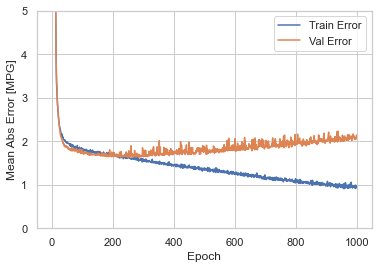

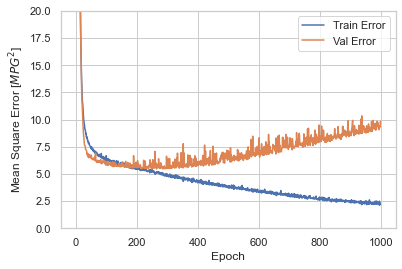

In [21]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,5])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,20])

plot_history(history)

In [22]:
# Model Improvement

model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................

In [23]:
# Testing the Model

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.96 MPG


                      Car name  Actual MPG  Predicted MPG
0           amc ambassador dpl        28.1      31.282335
1                    ford f250        35.1      39.668053
2                     hi 1200d        32.2      32.462627
3                toyota corona        31.0      28.679996
4                   ford pinto        33.7      33.736706
..                         ...         ...            ...
75    chevrolet cavalier wagon        18.0      19.068556
76  pontiac j2000 se hatchback        19.2      20.236931
77              toyota corolla        19.2      17.598909
78          honda civic (auto)        43.1      38.429874
79                 ford ranger        18.0      16.970736

[80 rows x 3 columns]


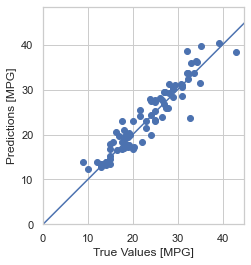

In [24]:
# Make predictions
# ----------------

# Predicting MPG values using data in the testing set:

test_predictions = model.predict(normed_test_data).flatten()
dataset1 = pd.DataFrame({'Car name': tsc["car name"].to_numpy(), 'Actual MPG': test_labels.to_numpy(), 'Predicted MPG': test_predictions})
print(dataset1);
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

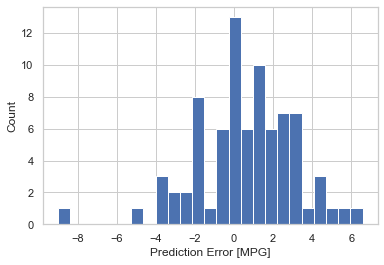

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [26]:
# Features Scaling
columns = normed_train_data.columns
column_test = normed_test_data.columns
y_train = train_labels.copy()

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

scaler = preprocessing.Normalizer()
X_train = scaler.fit_transform(normed_train_data)
X_train = pd.DataFrame(X_train, columns=columns)

X_test = scaler.transform(normed_test_data)
X_test = pd.DataFrame(X_test, columns=column_test)

In [27]:
# Scikit learn Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train_encoded)

pred_log = log.predict(X_test)

log.score(X_train, y_train_encoded)
logistic_score = round(log.score(X_train, y_train_encoded)*100,2)
logistic_score

16.35

In [28]:
# Scikit learn RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train_encoded)
pred_random = rf.predict(X_test)

rf.score(X_train, y_train_encoded)

random_score = round(rf.score(X_train, y_train_encoded)*100,2)
random_score

100.0

In [29]:
# Scikit learn DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train_encoded)

pred_tree = tree.predict(X_test)

tree.score(X_train, y_train_encoded)
tree_score = round(tree.score(X_train, y_train_encoded)*100,2)
tree_score

100.0

In [30]:
# Scikit learn KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train_encoded)
pred_knn = knn.predict(X_test)

knn.score(X_train, y_train_encoded)
knn_score = round(knn.score(X_train, y_train_encoded)*100,2)
knn_score

100.0

In [31]:
# Scikit learn GaussianNB (Gaussian Naive Bayes)

gaus = GaussianNB()
gaus.fit(X_train, y_train_encoded)
pred_gaus = gaus.predict(X_test)

gaus.score(X_train, y_train_encoded)
gaus_score = round(gaus.score(X_train, y_train_encoded)*100,2)
gaus_score

54.09

In [32]:
# Scikit learn LinearSVM (Linear Support Vector Machine)

svc = LinearSVC()
svc.fit(X_train, y_train_encoded)

pred_svc = svc.predict(X_test)

svc.score(X_train, y_train_encoded)
svc_score = round(svc.score(X_train, y_train_encoded) * 100, 2)
svc_score

22.96

In [33]:
df_score = pd.DataFrame({"Models": ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'], 
                       "Score": [svc_score, knn_score, logistic_score, random_score, gaus_score, tree_score]})
df_score.sort_values(by= "Score", ascending=False)

,Models,Score
1,KNN,100.00
3,Random Forest,100.00
5,Decision Tree,100.00
4,Naive Bayes,54.09
0,Support Vector Machines,22.96
2,Logistic Regression,16.35
